In this notebook, we are trying to do some data visualization and review classification modelling on Amazon Musical Instrument Reviews dataset. This will be used to get some insights and intution about the data, on infuelce the modeling decisions made.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from joblib import dump, load
%matplotlib inline

# Loading the data and modifying some features

In [2]:
df = pd.read_csv('../data/training.csv')
df.head()

Unnamed: 0                                         reviewText  \
0        9918  This is a great stand and highly adjustable. C...   
1        6296  My guitar, just Love it! This stand is exactly...   
2          59  Works for practice ... it's a guitar instrumen...   
3        3016  Bought this strap for my acoustic guitar howev...   
4        4801  I bought this mixer in order to combine my bas...   

                                         summary  overall  
0                                Excellent stand        5  
1                               Can't complaint!        5  
2  maybe not the best but it serves it's purpose        3  
3                     More for electric guitars.        4  
4     great for silent headphone guitar practice        4

In [3]:
df = df.dropna()
df.head()

Unnamed: 0                                         reviewText  \
0        9918  This is a great stand and highly adjustable. C...   
1        6296  My guitar, just Love it! This stand is exactly...   
2          59  Works for practice ... it's a guitar instrumen...   
3        3016  Bought this strap for my acoustic guitar howev...   
4        4801  I bought this mixer in order to combine my bas...   

                                         summary  overall  
0                                Excellent stand        5  
1                               Can't complaint!        5  
2  maybe not the best but it serves it's purpose        3  
3                     More for electric guitars.        4  
4     great for silent headphone guitar practice        4

In [4]:
def length(text):
    return len(text)
df['length'] = df['reviewText'].apply(length)
df['summaryLength'] = df['summary'].apply(length)
df.head()

Unnamed: 0                                         reviewText  \
0        9918  This is a great stand and highly adjustable. C...   
1        6296  My guitar, just Love it! This stand is exactly...   
2          59  Works for practice ... it's a guitar instrumen...   
3        3016  Bought this strap for my acoustic guitar howev...   
4        4801  I bought this mixer in order to combine my bas...   

                                         summary  overall  length  \
0                                Excellent stand        5     503   
1                               Can't complaint!        5     111   
2  maybe not the best but it serves it's purpose        3     120   
3                     More for electric guitars.        4     196   
4     great for silent headphone guitar practice        4    1005   

   summaryLength  
0             15  
1             16  
2             45  
3             26  
4             42

In [5]:
def length(text):
    return len(text.split())
df['lengthWords'] = df['reviewText'].apply(length)
df['summaryLengthWords'] = df['summary'].apply(length)
df.head()

Unnamed: 0                                         reviewText  \
0        9918  This is a great stand and highly adjustable. C...   
1        6296  My guitar, just Love it! This stand is exactly...   
2          59  Works for practice ... it's a guitar instrumen...   
3        3016  Bought this strap for my acoustic guitar howev...   
4        4801  I bought this mixer in order to combine my bas...   

                                         summary  overall  length  \
0                                Excellent stand        5     503   
1                               Can't complaint!        5     111   
2  maybe not the best but it serves it's purpose        3     120   
3                     More for electric guitars.        4     196   
4     great for silent headphone guitar practice        4    1005   

   summaryLength  lengthWords  summaryLengthWords  
0             15           95                   2  
1             16           25                   2  
2             45           23                   9  
3             26           38                   4  
4             42          182                   6

In [6]:
import string
from nltk.corpus import stopwords
def text_process(review):
    """
    Takes in a string of text, then perform the following:
    1. Remove all punctuations
    2. Remove all stopwords
    3. Return a list of cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in review if char not in string.punctuation]
    
    # Join the characters again to form the string
    nopunc = ''.join(nopunc)
    
    # Remove stopwords
    return " ".join([word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [7]:
df['reviewText'] = df['reviewText'].apply(text_process)
df['summary'] = df['summary'].apply(text_process)

In [8]:
df.head()

Unnamed: 0                                         reviewText  \
0        9918  great stand highly adjustable used seated stan...   
1        6296  guitar love stand exactly hoped would want nee...   
2          59  works practice guitar instrument cable say may...   
3        3016  bought strap acoustic guitar however neck butt...   
4        4801  bought mixer order combine bass guitar mp3 pla...   

                                  summary  overall  length  summaryLength  \
0                         excellent stand        5     503             15   
1                          cant complaint        5     111             16   
2               maybe best serves purpose        3     120             45   
3                        electric guitars        4     196             26   
4  great silent headphone guitar practice        4    1005             42   

   lengthWords  summaryLengthWords  
0           95                   2  
1           25                   2  
2           23                   9  
3           38                   4  
4          182                   6

# Lets visualize!

In [9]:
import plotly.offline as py
import plotly.graph_objs as go

score = df['overall'].value_counts()

labels = score.index
values = score.values

scores = go.Pie(labels = labels,
               values = values,
               hole = 0.25)

df_scores = [scores]

layout = go.Layout(
           title = 'Percentage of Ratings for Amazon Musical Instruments')

fig = go.Figure(data = df_scores,
                 layout = layout)

py.iplot(fig)

Let's find out how long summary texts are for different ratings

<AxesSubplot:xlabel='length', ylabel='Count'>

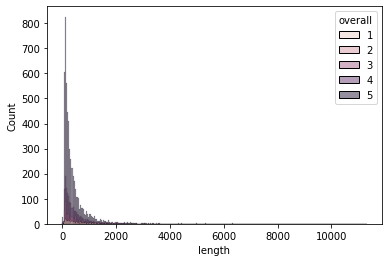

In [10]:
sns.histplot(data=df, x="length", hue="overall")

<AxesSubplot:xlabel='lengthWords', ylabel='Count'>

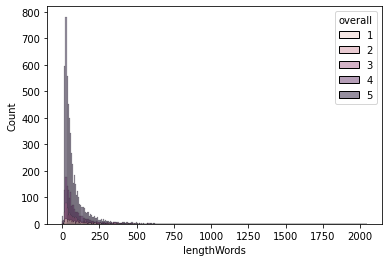

In [11]:
sns.histplot(data=df, x="lengthWords", hue="overall")

<AxesSubplot:xlabel='summaryLength', ylabel='Count'>

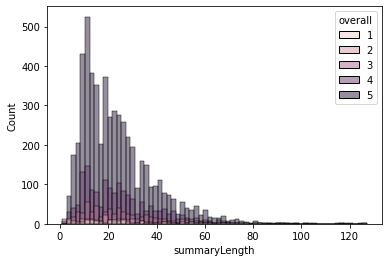

In [12]:
sns.histplot(data=df, x="summaryLength", hue="overall")

<AxesSubplot:xlabel='summaryLengthWords', ylabel='Count'>

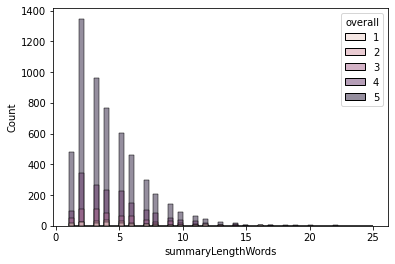

In [13]:
sns.histplot(data=df, x="summaryLengthWords", hue="overall")

In [14]:
# Whats this long review?! Someone really put in the effort
df[df['length'] == df['length'].max()]['reviewText'].iloc[0]

'comparisons compared side side following pedalsfulltone mini deja vibe 200 dunlop univibe discontinued stainless steel model220 dunlop rotovibe 180 voodoo labs micro vibe 150 bbe soul bender 129 well comparing different beasts modulation family mxr phase 90 mxr evh flanger boss chorus behringer vibrato behringer time machinesummary factsa great pedal favorite univibe doesnt take lot space standard power supply good visibility control knob settings add subtract frequencies signal add noise pedal univibe group say almost certainly going one keep might slightly less ability produce thick univibe effect others still need play little overall love pedal 60 bucks downsides see led flash speed rate speed control top left makes hard toe tweak right foot quality seems ok time tell durabilitypros smallish form factor although slightly larger boss pedal doesnt take much room standard pedal standard power supply 9v center negative jack top back easy access way patch cables sides switchable chorusu

/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Rating vs Review Length')

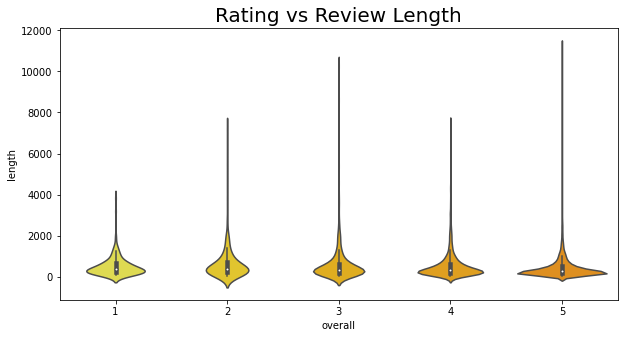

In [15]:
plt.figure(figsize=[10,5])
sns.violinplot(df['overall'], df['length'], palette='Wistia')
plt.title('Rating vs Review Length', fontsize = 20)

/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Rating vs Summary characters length')

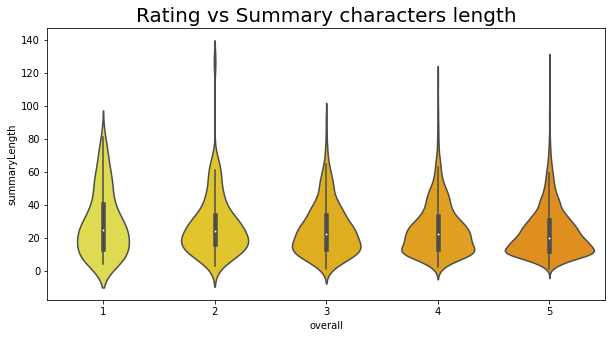

In [16]:
plt.figure(figsize=[10,5])
sns.violinplot(df['overall'], df['summaryLength'], palette='Wistia')
plt.title('Rating vs Summary characters length', fontsize = 20)

# Building a baseline classification model

Text processing consists of removing all punctuations and removing all stopwords

In [17]:
from sklearn.model_selection import train_test_split
text_train, text_test, target_train, target_test = train_test_split(df['reviewText'].tolist(), df['overall'].tolist(), stratify=df['overall'],  test_size=0.2)
print(len(text_train), len(text_test), len(target_train) + len(target_test))

6561 1641 8202


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer="char_wb", ngram_range=(2, 4), stop_words="english", use_idf=True)
text_train_tfidf = vectorizer.fit_transform(text_train)
dump(text_train_tfidf, '../artifacts/transform.tfidf')
print(text_train_tfidf.shape)
print(vectorizer.vocabulary_)

(6561, 43273)
{' a': 933, 'ab': 8685, 'bs': 11802, 'so': 36494, 'ol': 30089, 'lu': 25780, 'ut': 40513, 'te': 37656, 'el': 16120, 'ly': 25929, 'y ': 42317, ' ab': 948, 'abs': 8736, 'bso': 11830, 'sol': 36533, 'olu': 30218, 'lut': 25876, 'ute': 40540, 'tel': 37738, 'ely': 16314, 'ly ': 25930, ' abs': 957, 'abso': 8742, 'bsol': 11831, 'solu': 36540, 'olut': 30221, 'lute': 25878, 'utel': 40546, 'tely': 37743, 'ely ': 16315, ' c': 1356, 'co': 13014, 'om': 30238, 'mp': 27010, 'pl': 32335, 'la': 24297, 'ai': 9256, 'in': 22058, 'nt': 29020, 'ts': 38681, 's ': 35352, ' co': 1462, 'com': 13058, 'omp': 30331, 'mpl': 27082, 'pla': 32337, 'lai': 24340, 'ain': 9298, 'int': 22277, 'nts': 29141, 'ts ': 38682, ' com': 1474, 'comp': 13070, 'ompl': 30340, 'mpla': 27083, 'plai': 32340, 'lain': 24343, 'aint': 9317, 'ints': 22295, 'nts ': 29142, 'ca': 12108, 'bl': 11519, 'le': 24625, 'es': 17093, ' ca': 1370, 'cab': 12119, 'abl': 8711, 'ble': 11532, 'les': 24788, 'es ': 17094, ' cab': 1375, 'cabl': 12123, '

In [19]:
from yellowbrick.text import TSNEVisualizer

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

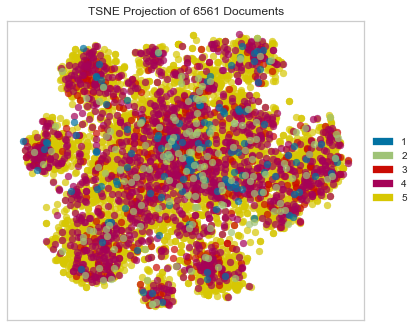

<AxesSubplot:title={'center':'TSNE Projection of 6561 Documents'}>

In [20]:
tsne = TSNEVisualizer()
tsne.fit(text_train_tfidf, target_train)
tsne.show()

(6561, 12982)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

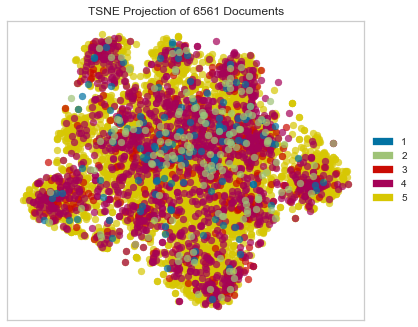

<AxesSubplot:title={'center':'TSNE Projection of 6561 Documents'}>

In [21]:
from sklearn.feature_selection import SelectPercentile, chi2
f_selector = SelectPercentile(chi2, percentile=30)
text_train_tfidf_chi2 = f_selector.fit_transform(text_train_tfidf, target_train)
dump(f_selector, '../artifacts/feature.selector')
print(text_train_tfidf_chi2.shape)
tsne_chi2 = TSNEVisualizer()
tsne_chi2.fit(text_train_tfidf_chi2, target_train)
tsne_chi2.show()

In [22]:
print(f"Train counts: {Counter(target_train)}")
print(f"Test counts: {Counter(target_test)}")

Train counts: Counter({5: 4428, 4: 1337, 3: 505, 2: 158, 1: 133})
Test counts: Counter({5: 1107, 4: 335, 3: 127, 2: 39, 1: 33})


In [23]:
from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
dump(target_encoder, '../artifacts/target.labelizer')

encoded_train_targets = target_encoder.fit_transform(target_train)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [25]:
text_test_tfidf = vectorizer.transform(text_test)
text_test_tfidf_chi2 = f_selector.transform(text_test_tfidf)

encoded_train_targets = target_encoder.fit_transform(target_train)
encoded_test_targets = target_encoder.transform(target_test)

Fitting the model and establishing a few baselines!

In [26]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(text_train_tfidf_chi2, encoded_train_targets)
mnb_predictions = mnb_model.predict(text_test_tfidf_chi2)
print(Counter(mnb_predictions))
print(classification_report(target_test, target_encoder.inverse_transform(mnb_predictions)))

Counter({4: 1641})
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00       127
           4       0.00      0.00      0.00       335
           5       0.67      1.00      0.81      1107

    accuracy                           0.67      1641
   macro avg       0.13      0.20      0.16      1641
weighted avg       0.46      0.67      0.54      1641



/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [27]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,LinearSVC
from multiprocessing import cpu_count
import numpy as np
from sklearn.model_selection import GridSearchCV

# clf_svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0, probability=True)
# clf_svc.fit(text_train_tfidf_chi2, encoded_train_targets)

cores=cpu_count()-1
C_range = 10.0 ** np.arange(-4, 4);                  #c value range 
param_grid = dict(estimator__C=C_range.tolist()) 
clf_ovr = OneVsRestClassifier(LinearSVC(class_weight='balanced'),n_jobs=cores)
clf_svc = GridSearchCV(clf_ovr, param_grid,n_jobs=cores,verbose=2)  #grid search
clf_svc.fit(text_train_tfidf_chi2, encoded_train_targets)                                                   #training svm model                                     

dump(clf_svc.best_estimator_, '../artifacts/clf_svc.model')
svc_predictions = clf_svc.best_estimator_.predict(text_test_tfidf_chi2)
print(Counter(target_encoder.inverse_transform(svc_predictions)))
print(classification_report(target_test, target_encoder.inverse_transform(svc_predictions)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Counter({5: 1126, 4: 394, 3: 90, 1: 18, 2: 13})
              precision    recall  f1-score   support

           1       0.33      0.18      0.24        33
           2       0.23      0.08      0.12        39
           3       0.22      0.16      0.18       127
           4       0.31      0.37      0.34       335
           5       0.76      0.77      0.76      1107

    accuracy                           0.61      1641
   macro avg       0.37      0.31      0.33      1641
weighted avg       0.60      0.61      0.60      1641



In [28]:
## LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
clf_lr = LogisticRegression( n_jobs=cores, class_weight='balanced', 
                              random_state=0, solver='liblinear', 
                              max_iter=50000)
param_grid = dict(dual=[True, False],
                 solver=['liblinear', 'lbfgs'],
                 warm_start=[True, False]) 
clf_lr_gs = GridSearchCV(clf_lr, param_grid,n_jobs=cores,verbose=2)  #grid search
clf_lr_gs.fit(text_train_tfidf_chi2, encoded_train_targets)
dump(clf_lr_gs.best_estimator_, '../artifacts/clf_lr.model')
predictions_lr = clf_lr_gs.best_estimator_.predict(text_test_tfidf_chi2)
print(classification_report(target_test, target_encoder.inverse_transform(predictions_lr)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning:

One or more of the test scores are non-finite: [0.6735246 0.6735246       nan       nan 0.6735246 0.6735246 0.566071
 0.566071 ]

/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 15.



              precision    recall  f1-score   support

           1       0.11      0.12      0.11        33
           2       0.15      0.13      0.14        39
           3       0.28      0.18      0.22       127
           4       0.33      0.19      0.24       335
           5       0.75      0.89      0.82      1107

    accuracy                           0.66      1641
   macro avg       0.32      0.30      0.30      1641
weighted avg       0.60      0.66      0.62      1641



In [29]:
## Random forests
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer

clf_rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced_subsample').fit(text_train_tfidf_chi2, encoded_train_targets)
dump(clf_rf, 'clf_rf.model') 
predictions_rf = clf_rf.predict(text_test_tfidf_chi2)
print(classification_report(target_test, target_encoder.inverse_transform(predictions_rf)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00       127
           4       1.00      0.00      0.01       335
           5       0.68      1.00      0.81      1107

    accuracy                           0.68      1641
   macro avg       0.34      0.20      0.16      1641
weighted avg       0.66      0.68      0.55      1641



/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [30]:
## lets reduce dimensions and try LR 

In [31]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5000, n_iter=7, random_state=42)
text_train_tfidf_svd = svd.fit_transform(text_train_tfidf)
text_test_tfidf_svd = svd.transform(text_test_tfidf)
dump(svd, '../artifacts/transform.svd')
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

[1.27021910e-02 1.38687098e-02 1.05645865e-02 ... 6.28258817e-06
 6.26841121e-06 6.26337520e-06]
0.9955625228264842
[31.43163456  8.84808459  7.73817517 ...  0.18830381  0.18809415
  0.18801664]


In [34]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC,LinearSVC
from multiprocessing import cpu_count
import numpy as np
from sklearn.model_selection import GridSearchCV

# clf_svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0, probability=True)
# clf_svc.fit(text_train_tfidf_chi2, encoded_train_targets)

cores=cpu_count()-1
C_range = 10.0 ** np.arange(-4, 4);                  #c value range 
param_grid = dict(estimator__C=C_range.tolist()) 
clf_ovr = OneVsRestClassifier(LinearSVC(class_weight='balanced'),n_jobs=cores)
clf_svc = GridSearchCV(clf_ovr, param_grid,n_jobs=cores,verbose=2)  #grid search
clf_svc.fit(text_train_tfidf_svd, encoded_train_targets)                                                   #training svm model                                     

dump(clf_svc.best_estimator_, '../artifacts/clf_svc_svd.model')
svc_predictions = clf_svc.best_estimator_.predict(text_test_tfidf_svd)
print(Counter(target_encoder.inverse_transform(svc_predictions)))
print(classification_report(target_test, target_encoder.inverse_transform(svc_predictions)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Counter({5: 1036, 4: 442, 3: 129, 1: 18, 2: 16})
              precision    recall  f1-score   support

           1       0.17      0.09      0.12        33
           2       0.25      0.10      0.15        39
           3       0.22      0.22      0.22       127
           4       0.30      0.40      0.34       335
           5       0.79      0.74      0.76      1107

    accuracy                           0.60      1641
   macro avg       0.35      0.31      0.32      1641
weighted avg       0.62      0.60      0.61      1641



In [32]:
## LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
clf_lr = LogisticRegression( n_jobs=cores, class_weight='balanced', 
                              random_state=0, solver='liblinear', 
                              max_iter=50000)
param_grid = dict(dual=[True, False],
                 solver=['liblinear', 'lbfgs'],
                 warm_start=[True, False]) 
clf_lr_gs = GridSearchCV(clf_lr, param_grid, n_jobs=cores,verbose=2)  #grid search
clf_lr_gs.fit(text_train_tfidf_svd, encoded_train_targets)
dump(clf_lr_gs.best_estimator_, '../artifacts/clf_lr_svd.model')
predictions_lr = clf_lr_gs.best_estimator_.predict(text_test_tfidf_svd)
print(classification_report(target_test, target_encoder.inverse_transform(predictions_lr)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning:

One or more of the test scores are non-finite: [0.65340544 0.65340544        nan        nan 0.65340544 0.65340544
 0.5442764  0.5442764 ]

/Users/juricaseva/anaconda3/envs/amr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 15.



              precision    recall  f1-score   support

           1       0.16      0.18      0.17        33
           2       0.32      0.21      0.25        39
           3       0.29      0.20      0.24       127
           4       0.39      0.21      0.28       335
           5       0.76      0.90      0.82      1107

    accuracy                           0.67      1641
   macro avg       0.38      0.34      0.35      1641
weighted avg       0.63      0.67      0.64      1641

